----------
**Customer segment Analysis and Prediction**
=====================================

***Recall =  Precision =  Accuracy =  ***

***Manoj Jha, Jaikumar K, Vivek K R***

*Nov 2022*

----------

- <a href='#1'>1. Load libraries and read the data</a>  
    - <a href='#1.1'>1.1. Load libraries</a> 
    - <a href='#1.2'>1.2. EDA</a> 
    - <a href='#1.3'>1.3. Univariate analysis</a> 
    - <a href='#1.4'>1.4. Bivariate analysis</a> 
    - <a href='#1.5'>1.5. Conclusion of phase 1</a> 
- <a href='#2'>2. Phase 2</a> 
    - <a href='#2.1'>2.1. Handle missing values</a> 
    - <a href='#2.2'>2.2. Finding Outliers</a> 
    - <a href='#2.3'>2.3. Features distribution (hue = diagnosis)</a> 
    - <a href='#2.4'>2.4. Correlation matrix</a> 
    - <a href='#2.6'>2.5. Positive correlated features</a> 
    - <a href='#2.7'>2.6. Uncorrelated features</a> 
    - <a href='#2.7'>2.7. Negative correlated features</a> 
- <a href='#3'>3. Principal Component Analysis</a>
    - <a href='#3.1'>3.1. Compute PCA</a> 
    - <a href='#3.2'>3.2. PCA pie plot with 6 components (88.8%)</a> 
    - <a href='#3.2'>3.3. PCA scatter plot with 2 components (63.3%)</a> 
    - <a href='#3.3'>3.4. PCA scatter plot with 3 components (72.7%)</a>
- <a href='#4'>4. Define functions</a>
    - <a href='#4.1'>4.1. Confusion matrix and show metrics</a> 
    - <a href='#4.2'>4.2. Precision – Recall curve</a> 
    - <a href='#4.3'>4.3. ROC curve</a> 
    - <a href='#4.4'>4.4. Learning curve</a> 
    - <a href='#4.5'>4.5. Cross validation metrics</a> 

# <a id='1'>1. Load libraries and read the data</a> 

## <a id='1.1'>1.1. Load libraries</a> 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from itertools import chain
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

warnings.filterwarnings('ignore') #ignore warning messages

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



## <a id='1.2'>1.2. Read the data</a>

In [2]:
# Read data
data = pd.read_csv('/kaggle/input/customer-segmentation-buy-will-not-buy-nan/customer_segmentation_buy_will_not_buy_clustering.csv')
print(data.head())

     item1    item2    item3    item4   item5   item6    item7   item8 item9  \
0 -11.2254  14.1592  12.9903   9.4747  4.6959  3.2277  16.1323  0.9459     d   
1 -12.2490  13.9036   7.1043   3.9408  0.6942  2.7240   7.0987 -2.0057     d   
2  -9.4913  13.7907  13.4159  10.6941  3.2277  3.0480  11.2321  0.8326     f   
3  -0.0023  14.3365  13.5337   8.0007  3.5825  3.3192   9.1928  2.8052     f   
4  -0.1273  13.6008   7.5372   8.6179  5.0920  2.8564  12.0897 -4.7146     d   

   item10  ...   item35   item36   item37   item38   item39   item40   item41  \
0  4.5563  ...  13.1539  11.0811  11.6745  11.7116 -23.7662  12.5871   0.3144   
1  7.8754  ...  11.3166  12.9463  11.3405  12.8791 -31.0154   8.3203  -2.4160   
2  7.4749  ...  15.8862  12.0839  11.4469   5.8048   3.4910  13.4877  -6.4757   
3  8.5139  ...  15.3870  11.2476  11.1353  11.8147 -39.1025  12.8864 -20.0529   
4  7.3956  ...  12.7873  11.8687  11.6574   4.3396  18.2998  14.4215  -0.6626   

    item42   item43   item44  
0

In [3]:
data.shape

(100001, 44)

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 44 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   item1   99984 non-null   float64
 1   item2   99993 non-null   float64
 2   item3   99999 non-null   float64
 3   item4   100001 non-null  float64
 4   item5   99997 non-null   float64
 5   item6   99995 non-null   float64
 6   item7   99983 non-null   float64
 7   item8   99991 non-null   float64
 8   item9   99999 non-null   object 
 9   item10  99989 non-null   float64
 10  item11  99991 non-null   float64
 11  item12  99995 non-null   float64
 12  item13  100001 non-null  float64
 13  item14  88272 non-null   float64
 14  item15  99995 non-null   float64
 15  item16  99990 non-null   float64
 16  item17  99995 non-null   float64
 17  item18  99997 non-null   float64
 18  item19  99987 non-null   float64
 19  item20  99989 non-null   float64
 20  item21  99991 non-null   float64
 21  item22  10

In [5]:
data.describe()

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item35,item36,item37,item38,item39,item40,item41,item42,item43,item44
count,99984.000000,99993.000000,99999.000000,100001.000000,99997.000000,99995.000000,99983.000000,99991.000000,99989.000000,99991.000000,...,99997.000000,100001.000000,100001.000000,100001.000000,100001.000000,100000.000000,100000.000000,100000.000000,100001.000000,99999.000000
mean,-3.022675,14.023864,8.562648,10.529625,4.301473,3.018971,10.695885,-1.619094,6.792042,11.079831,...,9.283354,11.222831,11.570013,8.965875,-13.116952,11.311989,-12.485909,14.716707,16.694053,12.742962
std,65.156048,0.191042,4.639095,14.158835,2.848168,0.526099,5.147802,4.050759,2.040791,2.588036,...,5.930994,0.696035,0.309482,7.216663,23.311754,2.860446,10.587774,11.383226,7.868070,0.691586
min,-24.875700,7.651800,-4.966100,1.216700,-5.322500,1.470600,0.408400,-15.043400,0.016200,5.074800,...,-8.535900,8.859000,10.652800,-9.939600,-144.032400,1.206200,-47.686200,-23.902200,-6.977700,10.571600
25%,-7.490050,13.894400,5.124250,5.796900,2.173200,2.633550,8.456100,-4.730950,5.249500,9.879450,...,4.517800,10.711300,11.344200,5.319600,-28.672100,9.234600,-20.684525,6.362475,10.653400,12.270300
50%,-3.273650,14.025100,8.630200,7.527700,4.281600,3.009900,10.523400,-1.602800,6.820100,11.100900,...,9.153200,11.244500,11.564300,9.433100,-12.504600,11.287300,-12.534800,14.590450,16.662400,12.747200
75%,0.841425,14.163600,12.310700,9.270200,6.300600,3.403000,12.761700,1.373250,8.314800,12.255700,...,13.729200,11.759400,11.804300,13.086100,3.150600,13.303725,-4.262475,23.074225,22.564900,13.235100
max,20478.690000,14.654500,22.331500,72.546800,14.594500,4.789400,1324.665000,10.376800,12.991800,648.220000,...,25.323100,13.469600,12.577900,1324.665000,142.247800,21.080700,18.731800,54.273800,41.153000,15.317200


In [6]:
data.isnull().sum()

item1        17
item2         8
item3         2
item4         0
item5         4
item6         6
item7        18
item8        10
item9         2
item10       12
item11       10
item12        6
item13        0
item14    11729
item15        6
item16       11
item17        6
item18        4
item19       14
item20       12
item21       10
item22        0
item23        0
item24        3
item25        3
item26        0
item27        5
item28        0
item29        0
item30        0
item31        4
item32        2
item33        1
item34        1
item35        4
item36        0
item37        0
item38        0
item39        0
item40        1
item41        1
item42        1
item43        0
item44        2
dtype: int64

We can see the NaN count in the above output. item14 has the most NaN count

## <a id='1.3'>1.3. EDA</a>

<AxesSubplot:>

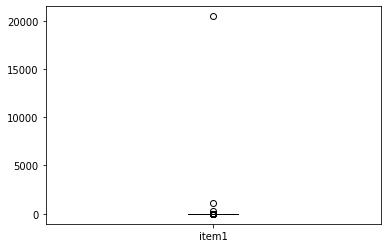

In [7]:
data.boxplot(column=['item1'], grid=False, color='black')

In the above output we can see the outliers in the data. because of which most of the datais near to 0 but few/one data is far from the 0. This is the outlier in our data

In [8]:
#Splitting the data in contiuous variable set and Categorical set
X = data.drop(['item22','item9'], axis = 1)
y = data[['item22','item9']]                          # Y or N
X.head()

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item35,item36,item37,item38,item39,item40,item41,item42,item43,item44
0,-11.2254,14.1592,12.9903,9.4747,4.6959,3.2277,16.1323,0.9459,4.5563,10.6019,...,13.1539,11.0811,11.6745,11.7116,-23.7662,12.5871,0.3144,21.8492,12.1551,11.2099
1,-12.2490,13.9036,7.1043,3.9408,0.6942,2.7240,7.0987,-2.0057,7.8754,13.2961,...,11.3166,12.9463,11.3405,12.8791,-31.0154,8.3203,-2.4160,25.8155,11.5302,12.4252
2,-9.4913,13.7907,13.4159,10.6941,3.2277,3.0480,11.2321,0.8326,7.4749,9.6369,...,15.8862,12.0839,11.4469,5.8048,3.4910,13.4877,-6.4757,5.9034,20.3715,13.4176
3,-0.0023,14.3365,13.5337,8.0007,3.5825,3.3192,9.1928,2.8052,8.5139,13.9320,...,15.3870,11.2476,11.1353,11.8147,-39.1025,12.8864,-20.0529,19.2790,17.9902,12.8956
4,-0.1273,13.6008,7.5372,8.6179,5.0920,2.8564,12.0897,-4.7146,7.3956,12.2021,...,12.7873,11.8687,11.6574,4.3396,18.2998,14.4215,-0.6626,2.3012,20.8598,12.6211


In [9]:
y.head()

,item22,item9
0,Y,d
1,N,d
2,Y,f
3,Y,f
4,N,d


## <a id='1.3'>1.3. Univariate analysis</a>
Univariate analysis is the most basic form of the data analysis technique. When we want to understand the data contained by only one variable and don’t want to deal with the causes or effect relationships then a Univariate analysis technique is used.

#### Univariate Analysis of continuous Variables

<AxesSubplot:xlabel='item1', ylabel='Count'>

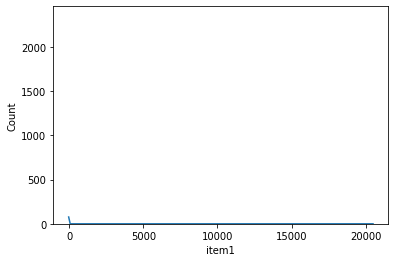

In [10]:
sns.histplot(data.item1,kde=True)

#### Univariate Analysis of Categorical Variables

First we will plot count plots of categorical plot.


<AxesSubplot:xlabel='item22', ylabel='count'>

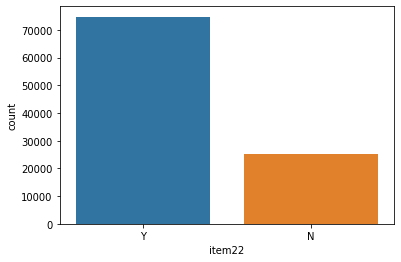

In [11]:
# plot count plot for the gender column
sns.countplot(y.item22)

In the above output we can see the total number of No and Yes which is around 75K+ for Yes and 25K+ for No

## <a id='1.4'>1.4. Bivariate Analysis</a>

Bivariate analysis is slightly more analytical than Univariate analysis. When the data set contains two variables and researchers aim to undertake comparisons between the two data set then Bivariate analysis is the right type of analysis technique.
#### Bivariate Analysis of Continuous Variables:

In [12]:
corr_Val = X.corr()
corr_Val.style.background_gradient(cmap='coolwarm')

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20,item21,item23,item24,item25,item26,item27,item28,item29,item30,item31,item32,item33,item34,item35,item36,item37,item38,item39,item40,item41,item42,item43,item44
item1,1.000000,-0.000612,0.003510,-0.001070,-0.000217,-0.000503,0.000495,-0.005411,0.000431,-0.004158,0.005270,-0.006019,0.001479,-0.001799,0.001974,0.000553,-0.003088,0.000339,-0.000599,0.004706,-0.004536,0.003178,-0.000652,0.000334,0.001915,-0.000282,-0.002883,0.003499,-0.005186,0.002835,0.001400,0.006027,-0.000227,0.001439,0.005468,0.000034,0.000892,0.001192,0.001519,0.003090,-0.005774,0.000015
item2,-0.000612,1.000000,0.003195,0.003228,-0.001500,0.003460,-0.001279,0.000237,-0.004400,-0.001616,-0.001003,-0.004059,0.004070,-0.001515,0.004333,0.000516,0.005990,-0.002215,0.000305,-0.000477,0.002027,0.000097,0.000919,-0.001570,0.005604,0.005572,-0.000978,-0.000041,0.007254,0.004633,0.007506,-0.001066,-0.001195,-0.004672,0.002275,-0.001577,-0.001286,-0.001641,0.001738,-0.007658,-0.003368,-0.002526
item3,0.003510,0.003195,1.000000,0.005960,-0.002724,0.006346,-0.000053,0.004658,-0.004734,0.000895,-0.003680,-0.008412,0.003850,0.000314,0.001469,-0.006156,-0.003627,-0.000275,-0.003782,-0.000889,0.003793,0.001653,0.002142,0.000551,0.003943,0.005753,-0.000181,-0.001246,-0.003483,-0.000984,-0.000064,-0.000797,0.000397,0.008382,0.001738,0.008221,0.002402,0.005979,0.005269,-0.004562,-0.001692,0.003867
item4,-0.001070,0.003228,0.005960,1.000000,-0.004168,-0.002450,-0.001016,0.002676,-0.008129,-0.001743,0.002486,-0.001257,0.000491,0.001399,-0.003446,-0.000370,-0.001972,0.000081,-0.000312,0.001915,-0.002457,0.000307,0.001699,-0.004385,0.000713,-0.002837,0.001106,-0.001273,-0.005434,0.001874,-0.002017,0.000531,-0.002095,-0.000626,0.004591,0.001467,0.005788,0.000663,-0.003006,-0.003144,0.000335,0.002824
item5,-0.000217,-0.001500,-0.002724,-0.004168,1.000000,0.001005,-0.000970,0.002018,-0.005203,0.003752,-0.000686,0.006972,-0.002874,0.004353,-0.004685,-0.000779,-0.001578,-0.005037,0.002212,-0.005111,0.002762,0.003640,-0.002689,0.003825,-0.003263,0.001251,-0.000718,-0.001875,-0.001003,-0.000964,-0.001375,0.009188,0.005224,-0.003652,-0.002834,-0.005383,0.000436,-0.005550,0.008250,0.007661,0.002637,-0.001123
item6,-0.000503,0.003460,0.006346,-0.002450,0.001005,1.000000,0.004895,0.003527,0.001266,0.003043,0.006222,-0.002698,0.004518,0.000226,0.003703,0.000032,-0.002517,-0.004848,-0.004172,-0.003777,-0.001541,-0.001812,-0.003772,-0.000251,0.002826,0.002605,0.002571,-0.002412,-0.000903,0.006038,-0.000396,-0.000088,-0.003997,-0.002266,-0.004909,0.001433,0.000214,-0.004397,-0.002815,-0.003981,-0.002696,-0.001173
item7,0.000495,-0.001279,-0.000053,-0.001016,-0.000970,0.004895,1.000000,0.000051,-0.003336,-0.002323,-0.001010,0.002894,0.000619,0.005349,-0.001340,-0.002166,0.003741,-0.001004,0.000188,0.003947,-0.000737,0.002965,-0.000056,0.005544,-0.005101,0.001592,0.001600,-0.004489,-0.003031,0.002168,-0.002681,0.004260,0.003073,0.003152,0.002373,0.000583,0.000003,0.002143,0.002943,-0.000751,0.003316,-0.005430
item8,-0.005411,0.000237,0.004658,0.002676,0.002018,0.003527,0.000051,1.000000,0.000163,0.005311,-0.003880,0.003980,0.004422,0.005025,0.000419,0.002910,0.003159,-0.001781,0.001949,-0.003584,0.006462,0.002170,-0.002255,0.001503,0.002498,-0.006053,0.006023,-0.007645,-0.000208,0.001878,-0.003116,0.001502,0.002109,0.004021,0.000498,-0.006427,-0.003927,-0.002334,0.006024,-0.000576,0.003936,0.001502
item10,0.000431,-0.004400,-0.004734,-0.008129,-0.005203,0.001266,-0.003336,0.000163,1.000000,-0.000239,0.002949,-0.002013,-0.001395,0.003398,-0.000579,0.005581,-0.003417,0.001344,0.003507,0.001383,0.000986,0.005937,0.003975,0.002964,-0.000222,-0.000532,-0.001971,-0.004099,0.003958,-0.006664,0.000984,0.001275,0.001999,0.000777,0.002643,-0.005429,-0.001487,-0.001410,0.000759,-0.000579,0.000028,-0.003330
item11,-0.004158,-0.001616,0.000895,-0.001743,0.003752,0.003043,-0.002323,0.005

<AxesSubplot:>

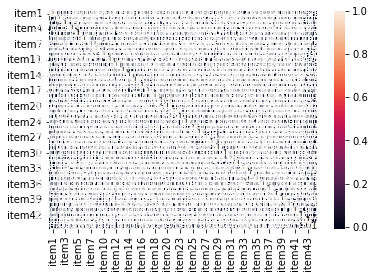

In [13]:
#plotting the heatmap for correlation
sns.heatmap(corr_Val, annot=True)

## <a id='1.5'>1.5. Conclusion of Phase 1</a>
<ul>
<li>-1 indicates a perfectly negative linear correlation between two variables
<li> 0 indicates no linear correlation between two variables
<li>1 indicates a perfectly positive linear correlation between two variables
</ul>
In the output above we can see most of the data are in negative or near to 0. only diagonal data is 1. that mean our data is not good to correlate at this poin.

## <a id='2'>2. Phase 2</a>
### <a id='2.1'>2.1. handling the missing Values</a>

In [14]:
data.isnull().sum()

item1        17
item2         8
item3         2
item4         0
item5         4
item6         6
item7        18
item8        10
item9         2
item10       12
item11       10
item12        6
item13        0
item14    11729
item15        6
item16       11
item17        6
item18        4
item19       14
item20       12
item21       10
item22        0
item23        0
item24        3
item25        3
item26        0
item27        5
item28        0
item29        0
item30        0
item31        4
item32        2
item33        1
item34        1
item35        4
item36        0
item37        0
item38        0
item39        0
item40        1
item41        1
item42        1
item43        0
item44        2
dtype: int64

In above output we can see that the item14 has the most missing values and many other features also has the missing value. So we'll find the number of missing value and then if require then drop the most missing feature and reassign the features.|

In [15]:
null_feat = pd.DataFrame(len(data['item22']) - data.isnull().sum(), columns = ['Count'])

trace = go.Bar(x = null_feat.index, y = null_feat['Count'] ,opacity = 0.8, marker=dict(color = 'lightgrey',
        line=dict(color='#000000',width=1.5)))

layout = dict(title =  "Missing Values")
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)


All features are complete, only 'item14' is 11K+ null, probably an error in the dataset, we drop it in below

## <a id='2.2'>2.2. Reassign target and drop useless features</a>

In [16]:
# Drop useless variables
data = data.drop(['item14','item9'],axis = 1)

# Reassign target
data.item22.replace(to_replace = dict(Y = 1, N = 0), inplace = True)


In [17]:
count_nan = data.isna().sum()
print ('Count of NaN: ' + str(count_nan))


Count of NaN: item1     17
item2      8
item3      2
item4      0
item5      4
item6      6
item7     18
item8     10
item10    12
item11    10
item12     6
item13     0
item15     6
item16    11
item17     6
item18     4
item19    14
item20    12
item21    10
item22     0
item23     0
item24     3
item25     3
item26     0
item27     5
item28     0
item29     0
item30     0
item31     4
item32     2
item33     1
item34     1
item35     4
item36     0
item37     0
item38     0
item39     0
item40     1
item41     1
item42     1
item43     0
item44     2
dtype: int64


In [18]:
data = data.dropna()
# To reset the indices
data = data.reset_index(drop = True)


In [19]:
count_nan = data.isna().sum()
print ('Count of NaN: ' + str(count_nan))


Count of NaN: item1     0
item2     0
item3     0
item4     0
item5     0
item6     0
item7     0
item8     0
item10    0
item11    0
item12    0
item13    0
item15    0
item16    0
item17    0
item18    0
item19    0
item20    0
item21    0
item22    0
item23    0
item24    0
item25    0
item26    0
item27    0
item28    0
item29    0
item30    0
item31    0
item32    0
item33    0
item34    0
item35    0
item36    0
item37    0
item38    0
item39    0
item40    0
item41    0
item42    0
item43    0
item44    0
dtype: int64


# <a id='2.3'>2.3. Exploratory Data Analysis (EDA)</a>

## <a id='2.3.1'>2.3.1. Head and describe</a> 

In [20]:
# Head
data.head()

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item35,item36,item37,item38,item39,item40,item41,item42,item43,item44
0,-11.2254,14.1592,12.9903,9.4747,4.6959,3.2277,16.1323,0.9459,4.5563,10.6019,...,13.1539,11.0811,11.6745,11.7116,-23.7662,12.5871,0.3144,21.8492,12.1551,11.2099
1,-12.2490,13.9036,7.1043,3.9408,0.6942,2.7240,7.0987,-2.0057,7.8754,13.2961,...,11.3166,12.9463,11.3405,12.8791,-31.0154,8.3203,-2.4160,25.8155,11.5302,12.4252
2,-9.4913,13.7907,13.4159,10.6941,3.2277,3.0480,11.2321,0.8326,7.4749,9.6369,...,15.8862,12.0839,11.4469,5.8048,3.4910,13.4877,-6.4757,5.9034,20.3715,13.4176
3,-0.0023,14.3365,13.5337,8.0007,3.5825,3.3192,9.1928,2.8052,8.5139,13.9320,...,15.3870,11.2476,11.1353,11.8147,-39.1025,12.8864,-20.0529,19.2790,17.9902,12.8956
4,-3.0387,13.9235,2.7114,6.9187,5.6208,3.4644,8.2088,-8.7982,8.9189,11.3831,...,13.3694,12.2367,11.1098,8.1802,-56.1416,8.3356,-19.4003,10.8916,2.4060,13.4662


In [21]:
# describe
data.describe()

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,...,item35,item36,item37,item38,item39,item40,item41,item42,item43,item44
count,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,...,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000,99867.000000
mean,-3.021644,14.023858,8.563157,10.529682,4.301214,3.018870,10.695630,-1.619857,6.791905,11.079853,...,9.283380,11.222726,11.569976,8.964327,-13.122363,11.312548,-12.487049,14.718166,16.693121,12.742987
std,65.193845,0.191075,4.639333,14.158069,2.847829,0.526115,5.149844,4.050229,2.040820,2.589006,...,5.930928,0.696051,0.309498,7.218348,23.313793,2.860720,10.587173,11.383665,7.868244,0.691569
min,-24.875700,7.651800,-4.966100,1.216700,-5.322500,1.470600,0.408400,-15.043400,0.016200,5.074800,...,-8.535900,8.859000,10.652800,-9.939600,-144.032400,1.206200,-47.686200,-23.902200,-6.977700,10.571600
25%,-7.487550,13.894400,5.125400,5.797600,2.172900,2.633450,8.455900,-4.731050,5.249500,9.879350,...,4.517200,10.711300,11.344150,5.317750,-28.677000,9.234850,-20.684850,6.366850,10.652450,12.270300
50%,-3.273900,14.025100,8.630700,7.528600,4.281600,3.009900,10.523400,-1.603700,6.820000,11.101100,...,9.152500,11.244400,11.564300,9.431500,-12.508900,11.288400,-12.537100,14.592700,16.661100,12.747100
75%,0.841700,14.163600,12.311000,9.270600,6.300300,3.403000,12.761850,1.371800,8.314250,12.255800,...,13.730100,11.759100,11.804300,13.083100,3.141800,13.304700,-4.265600,23.075600,22.563550,13.235100
max,20478.690000,14.654500,22.331500,72.546800,14.594500,4.789400,1324.665000,10.376800,12.991800,648.220000,...,25.323100,13.469600,12.577900,1324.665000,142.247800,21.080700,18.731800,54.273800,41.153000,15.317200


In about output we can see the count of total feature its mean-max value for each features. In the max we can see for item1 and item7 the  value is so much compared to most of the other features, So those are the our outliers that we need to remove from the data

### <a id='2.3.2'>2.3.2. Find outliers and remove it</a>

In [22]:
def find_outliers(df_in, col_name):
    Q1 = df_in[col_name].quantile(0.25)
    Q3 = df_in[col_name].quantile(0.75)
    IQR = Q3-Q1
    fence_low  = Q1-1.5*IQR
    fence_high = Q3+1.5*IQR
    outlier_list=((df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)).tolist()
    outlier_indexes=[i for i, x in enumerate(outlier_list) if x]
    return outlier_indexes
#----------------------
bad_indexes=[]
for col in data.columns:
    if data[col].dtype in ["int64", "float64"]:
        outlierindexes= find_outliers(data, col)
        bad_indexes.extend(outlierindexes)
#print(f"All Bad indexes:{bad_indexes}")  

# Drop (inplace) values set to be rejected
data.drop(data.index[bad_indexes], inplace=True)

<AxesSubplot:xlabel='item1'>

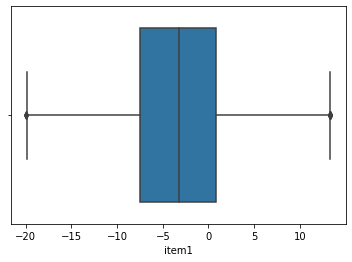

In [23]:
sns.boxplot(x=data['item1'])

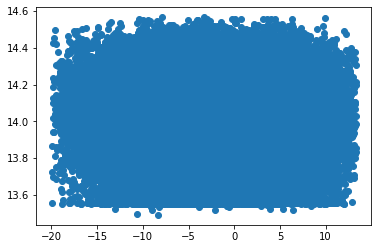

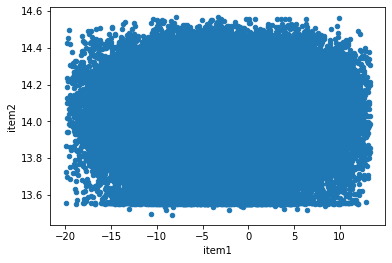

In [24]:
plt.scatter(data.item1,data.item2)
plt.show()

#plot the scatter plot of balance and age variable in data
data.plot.scatter(x="item1",y="item2")
plt.show()



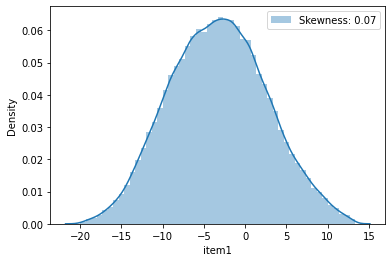

In [25]:

t=sns.distplot(data["item1"],label="Skewness: %.2f"%(data["item1"].skew()) )
t.legend()


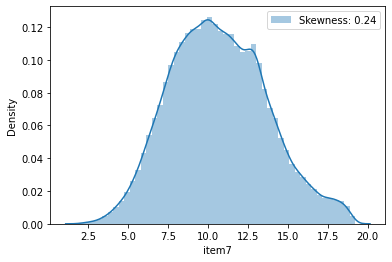

In [26]:

t=sns.distplot(data["item7"],label="Skewness: %.2f"%(data["item7"].skew()) )
t.legend()


We can see in distplot that data is forming the bell curve which means there are no more outliers. It has been removed.

##### Heatmap, for correlated data

In [27]:
corr_Val1 = data.corr()
corr_Val1.style.background_gradient(cmap='coolwarm')

,item1,item2,item3,item4,item5,item6,item7,item8,item10,item11,item12,item13,item15,item16,item17,item18,item19,item20,item21,item22,item23,item24,item25,item26,item27,item28,item29,item30,item31,item32,item33,item34,item35,item36,item37,item38,item39,item40,item41,item42,item43,item44
item1,1.000000,-0.002855,0.000220,0.004903,0.001700,-0.003291,0.001106,0.005654,-0.000559,0.000547,0.001724,0.001838,0.003935,-0.003751,-0.003935,0.002934,-0.003727,-0.001682,0.000649,0.000861,0.001111,-0.007086,-0.001386,-0.006351,-0.000198,0.001566,0.003241,0.002774,0.003093,0.000647,0.002371,0.002833,0.004661,-0.005556,-0.000730,-0.004139,-0.005562,-0.004322,-0.008082,0.006027,0.003166,0.000132
item2,-0.002855,1.000000,0.002248,0.007195,-0.002615,0.004055,-0.000994,-0.000124,-0.004692,0.002621,-0.000787,-0.003053,-0.001599,0.005351,-0.001909,0.003862,-0.004608,-0.006563,-0.000209,0.008539,0.001814,0.001156,0.000014,-0.002150,0.005161,0.005266,-0.001724,-0.001534,0.006859,0.005799,0.005410,-0.001818,-0.001381,-0.005525,0.001486,-0.004671,-0.002277,-0.002070,0.002766,-0.009942,-0.003537,-0.003937
item3,0.000220,0.002248,1.000000,0.000648,-0.003316,0.007116,-0.005657,0.004135,-0.004931,0.000851,-0.003791,-0.007215,-0.000658,0.001863,-0.003348,-0.002730,0.001319,-0.005478,-0.000634,0.001977,0.002864,0.002415,0.002020,0.000034,0.005167,0.005529,0.000105,-0.001546,-0.003074,-0.002796,-0.000647,-0.001112,0.000210,0.007664,0.001761,0.006911,0.001421,0.006516,0.003596,-0.005414,-0.000721,0.003170
item4,0.004903,0.007195,0.000648,1.000000,-0.000527,-0.002980,0.000467,-0.000846,0.005527,-0.001926,0.000302,-0.006133,-0.003492,0.000051,-0.005377,0.001979,-0.001954,-0.000813,-0.006309,-0.004638,-0.007904,-0.000622,-0.002302,-0.002646,0.003701,0.001725,-0.001205,-0.002855,-0.002972,-0.000824,0.005837,0.004893,0.001658,-0.000017,0.000301,-0.001151,-0.005488,0.001160,0.000336,0.001616,0.001506,-0.001914
item5,0.001700,-0.002615,-0.003316,-0.000527,1.000000,-0.000033,-0.001812,0.001960,-0.006349,-0.000006,-0.001288,0.005109,0.002767,-0.003412,-0.001453,-0.001252,0.003081,0.000261,-0.005238,-0.002159,0.002402,0.005006,-0.001887,0.004662,-0.002186,0.001374,-0.000985,-0.001296,-0.000617,-0.000429,0.001755,0.007779,0.006627,-0.002431,-0.002803,-0.002380,-0.000726,-0.004604,0.008948,0.007230,0.004056,-0.001656
item6,-0.003291,0.004055,0.007116,-0.002980,-0.000033,1.000000,0.000586,0.002946,0.001273,0.002827,0.007062,-0.002549,0.000199,0.002090,-0.003406,-0.002528,0.001123,-0.001535,-0.004125,-0.002196,-0.003360,-0.001282,-0.004549,0.000534,0.003653,0.003417,0.003003,-0.002425,-0.001705,0.005337,-0.002396,0.000400,-0.004625,-0.003145,-0.004443,0.001868,0.001800,-0.004022,-0.003477,-0.003506,-0.003479,-0.000899
item7,0.001106,-0.000994,-0.005657,0.000467,-0.001812,0.000586,1.000000,0.002467,0.002691,0.002381,0.003611,0.007958,0.000972,-0.000428,0.001535,0.005755,0.000772,0.009938,-0.001691,-0.005492,-0.001951,0.005079,-0.002528,0.003471,-0.008144,-0.002925,0.001317,0.000732,-0.000029,-0.001960,-0.001837,0.002573,0.004937,-0.000163,0.001635,-0.001139,-0.005187,-0.000198,0.003853,0.005719,-0.000650,-0.003228
item8,0.005654,-0.000124,0.004135,-0.000846,0.001960,0.002946,0.002467,1.000000,0.000655,-0.000058,-0.004016,0.006248,0.004364,0.001758,0.004396,0.003379,0.000306,0.008060,-0.003274,-0.005659,0.004290,-0.000053,-0.003120,0.001944,0.004281,-0.006639,0.005678,-0.008119,-0.000761,0.003802,-0.002581,0.002540,0.002271,0.003359,-0.000153,-0.007898,-0.003471,-0.002780,0.005727,0.000508,0.003241,0.000073
item10,-0.000559,-0.004692,-0.004931,0.005527,-0.006349,0.001273,0.002691,0.000655,1.000000,-0.004398,0.003769,-0.002131,0.002396,0.000293,-0.001062,-0.002714,-0.002826,0.007994,0.001101,0.001753,0.000472,0.006339,0.003531,0.003084,-0.000539,-0.001638,-0.001449,-0.003534,0.005461,-0.007218,-0.001120,0.001765,0.001344,0.001435,0.002810,-0.003370,0.000035,-0.000782,0.000559,-0.002587,0.000005,-0.000947
item11,0.000547,0.002621,0.000851,-0.001926,-0.000006,0.002827,0.002381,-

In [28]:
#To check the Skewness for all the columns 
data.skew()

item1     0.066564
item2    -0.144842
item3    -0.180463
item4    -0.023929
item5     0.135260
item6     0.052292
item7     0.235901
item8     0.057567
item10    0.002129
item11   -0.038445
item12    0.002200
item13    0.153355
item15   -0.113210
item16   -0.170462
item17   -0.054753
item18    0.140912
item19    0.159396
item20    0.174505
item21    0.024367
item22   -1.135636
item23    0.205471
item24   -0.112876
item25    0.054508
item26   -0.003114
item27    0.087740
item28   -0.026947
item29   -0.010006
item30   -0.048902
item31    0.038923
item32    0.080789
item33   -0.050044
item34    0.047587
item35    0.134191
item36   -0.135393
item37   -0.015505
item38   -0.306600
item39    0.033375
item40    0.077531
item41   -0.001360
item42    0.019092
item43    0.060681
item44   -0.066030
dtype: float64

<ul>
<li>Positive value means the distribution is skewed to the right.
<li>Negative value means the distribution is skewed to the left.
<li>0 means perfect normal distribution. The bell shaped curve.
    </ul>
    
We can see in the above list the column data is not skew

In [29]:
data.item22.describe()

count    91807.000000
mean         0.746882
std          0.434800
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: item22, dtype: float64

Our categorical data which is item22 is already encoded in 1 and 0 so we dont need to hot encode this data again.

## <a id='2.4'>2.4. Conclusion of phase 2</a>
In the phase 2 we found following details:
<ol>
<li>data had so much null values
<li>data contained outliers 
<li>data is skewed but not so much that we need to use any algorithm to fix it
<li>for item 14 there was more than 11K+ data was null so had to drop that column otherwise it could have implated the data count for other variables as well
<li>item9 was a category feature but with 3 category which we can ignore as we already have 35+ feature to train the data.
</ol>

## <a id='3'>3. Phase3</a>

### Standardize the data

<ul>
  <li>y = CustomerSegment (Purchased Yes/No) (target)</li>
  <li>X = features (item1, item2, ....)</li>
</ul>



In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91807 entries, 0 to 99866
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   item1   91807 non-null  float64
 1   item2   91807 non-null  float64
 2   item3   91807 non-null  float64
 3   item4   91807 non-null  float64
 4   item5   91807 non-null  float64
 5   item6   91807 non-null  float64
 6   item7   91807 non-null  float64
 7   item8   91807 non-null  float64
 8   item10  91807 non-null  float64
 9   item11  91807 non-null  float64
 10  item12  91807 non-null  float64
 11  item13  91807 non-null  float64
 12  item15  91807 non-null  float64
 13  item16  91807 non-null  float64
 14  item17  91807 non-null  float64
 15  item18  91807 non-null  float64
 16  item19  91807 non-null  float64
 17  item20  91807 non-null  float64
 18  item21  91807 non-null  float64
 19  item22  91807 non-null  int64  
 20  item23  91807 non-null  float64
 21  item24  91807 non-null  float64
 22

## <a i=5.2>5.2. Standard scaler (X)</a>

Why do you need to standardize your data ? For example, a variable that ranges between 0 and 100 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization in effect gives the variable with the larger range a bigger weight in the analysis

## <a i=5.3> 5.3 Train and Split</a>

In [31]:
#Splitting the data in contiuous variable set and Categorical set
X = data.drop(['item22'], axis = 1)
y = data.item22                          # Y or N 
print(X.head())

     item1    item2    item3    item4   item5   item6    item7   item8  \
0 -11.2254  14.1592  12.9903   9.4747  4.6959  3.2277  16.1323  0.9459   
2  -9.4913  13.7907  13.4159  10.6941  3.2277  3.0480  11.2321  0.8326   
3  -0.0023  14.3365  13.5337   8.0007  3.5825  3.3192   9.1928  2.8052   
4  -3.0387  13.9235   2.7114   6.9187  5.6208  3.4644   8.2088 -8.7982   
6  -5.7392  14.0828  13.6532   9.6036  7.0897  2.6966  10.3388  2.8121   

   item10   item11  ...   item35   item36   item37   item38   item39   item40  \
0  4.5563  10.6019  ...  13.1539  11.0811  11.6745  11.7116 -23.7662  12.5871   
2  7.4749   9.6369  ...  15.8862  12.0839  11.4469   5.8048   3.4910  13.4877   
3  8.5139  13.9320  ...  15.3870  11.2476  11.1353  11.8147 -39.1025  12.8864   
4  8.9189  11.3831  ...  13.3694  12.2367  11.1098   8.1802 -56.1416   8.3356   
6  7.1797  11.6939  ...   7.7021  11.6587  11.7529   8.4747 -10.9832  11.3983   

    item41   item42   item43   item44  
0   0.3144  21.8492  12.1551

In [32]:

# Normalization
#scaler = StandardScaler()
#X = scaler.fit_transform(X)


### Data Sampling

In [33]:
y.head()

0    1
2    1
3    1
4    1
6    0
Name: item22, dtype: int64

In [34]:
# Split here before EDA to avoid 'peeking' into the test data
rseed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rseed)
# Copy data of train data only (for EDA):
df_train = pd.DataFrame(data=pd.concat([y_train, X_train], axis=1), columns=data.columns.values)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64264 entries, 17111 to 17192
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   item1   64264 non-null  float64
 1   item2   64264 non-null  float64
 2   item3   64264 non-null  float64
 3   item4   64264 non-null  float64
 4   item5   64264 non-null  float64
 5   item6   64264 non-null  float64
 6   item7   64264 non-null  float64
 7   item8   64264 non-null  float64
 8   item10  64264 non-null  float64
 9   item11  64264 non-null  float64
 10  item12  64264 non-null  float64
 11  item13  64264 non-null  float64
 12  item15  64264 non-null  float64
 13  item16  64264 non-null  float64
 14  item17  64264 non-null  float64
 15  item18  64264 non-null  float64
 16  item19  64264 non-null  float64
 17  item20  64264 non-null  float64
 18  item21  64264 non-null  float64
 19  item23  64264 non-null  float64
 20  item24  64264 non-null  float64
 21  item25  64264 non-null  float64

In [36]:
y_train.head()

17111    0
59714    1
28532    1
11094    1
64064    1
Name: item22, dtype: int64

In [37]:
object= StandardScaler()
# standardization 
X_train = object.fit_transform(X_train) 
print(X_train)

[[-4.38170706e-01  7.35332751e-01  5.13082518e-01 ... -1.85691907e-01
   1.25035272e+00 -5.49004346e-02]
 [ 1.00313718e+00  6.56413348e-01  1.79156673e+00 ...  7.05273040e-01
   6.99406905e-01 -1.74129177e-02]
 [-8.42024815e-01 -5.86304188e-01  1.52648957e+00 ... -6.79017982e-02
   2.08773388e+00 -8.34437367e-01]
 ...
 [-6.42251942e-01 -1.24834554e-03  4.65424799e-01 ...  3.37493814e-01
   9.53959589e-01 -4.65810117e-01]
 [ 4.61128238e-01  2.87410277e-02 -1.69420958e-01 ... -1.19601210e-01
   6.11427516e-01 -1.22163712e-04]
 [ 1.46776455e+00 -9.50385702e-01  9.41159449e-01 ...  7.34769007e-01
   1.67945254e+00 -1.79269386e+00]]


### Variance Threshold:
Correlation map giving you a headache? Only the strong survive.

Check which features are the weakest

In [38]:
from sklearn.feature_selection import VarianceThreshold

#var_thr = VarianceThreshold(threshold = 0.0001) #Removing both constant and quasi-constant
#var_thr.fit(X_train)
#var_thr.get_support()
#to_drop_varThresh = [column for column in X_train.columns if column not in X_train.columns[var_thr.get_support()]]
#to_drop_varThresh

var_thr = VarianceThreshold(threshold = 0.25) #Removing both constant and quasi-constant
var_thr.fit(X_train)

var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

<ul>
<li>True: High Variance
<li>False: Low Variance
    </li>

# <a i=6>6. Predictive model : Logistic Regression</a>

## <a i=6.1>6.1. Logistic Regression and GridSearch CV to optimise hyperparameters (accuracy)</a>

In [39]:
'''
# Find best hyperparameters (accuracy)
log_clf = LogisticRegression(random_state = random_state)
param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
            }

CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)
'''

"\n# Find best hyperparameters (accuracy)\nlog_clf = LogisticRegression(random_state = random_state)\nparam_grid = {\n            'penalty' : ['l2','l1'],  \n            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]\n            }\n\nCV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)\nCV_log_clf.fit(X_train, y_train)\n\nbest_parameters = CV_log_clf.best_params_\nprint('The best parameters for using this model is', best_parameters)\n"

In [40]:

'''#Log with best hyperparameters
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf.fit(X_train, y_train)
y_pred = CV_log_clf.predict(X_test)
y_score = CV_log_clf.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes=class_names, 
                      title='Logistic Confusion matrix')
plt.savefig('6')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()'''

"#Log with best hyperparameters\nCV_log_clf = LogisticRegression(C = best_parameters['C'], \n                                penalty = best_parameters['penalty'], \n                                random_state = random_state)\n\nCV_log_clf.fit(X_train, y_train)\ny_pred = CV_log_clf.predict(X_test)\ny_score = CV_log_clf.decision_function(X_test)\n\n# Confusion maxtrix & metrics\ncm = confusion_matrix(y_test, y_pred)\nclass_names = [0,1]\nplt.figure()\nplot_confusion_matrix(cm, \n                      classes=class_names, \n                      title='Logistic Confusion matrix')\nplt.savefig('6')\nplt.show()\n\nshow_metrics()\n\n# ROC curve\nfpr, tpr, t = roc_curve(y_test, y_score)\nplot_roc()"

In [41]:

'''#Learning curve Log with best hyperpara
plot_learning_curve(CV_log_clf, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)
plt.savefig('7')
plt.show()
'''

"#Learning curve Log with best hyperpara\nplot_learning_curve(CV_log_clf, 'Learning Curve For Logistic Model', X, y, (0.85,1.05), 10)\nplt.savefig('7')\nplt.show()\n"

## Density Based Spacial Clustering of Applications with noise (DBSCAN)¶
We are going to use the DBSCAN for algorithm for the purpose of clustering. It is an unsupervised machine learning algorithm. It is used for clusters of high density. It automatically predicts the outliers and removes it. It is better than hierarchical and k-means clustering algorithm. It makes the clusters based on the parameters like epsilon,min points and noise.It separately predicts the core points, border points and outliers efficiently.

# Test_New_dataset

In [42]:
# Here is how to factorize categorical variable to be compatible as both numerical and str
#df_train['item22'] = pd.factorize(df_train['item22'])[0]
# or:
# df_train['diagnosis'] = df_train['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)
# maybe we can use this later
#df_train.head()

In [43]:
df_train.item22.head()

17111    0
59714    1
28532    1
11094    1
64064    1
Name: item22, dtype: int64